# 다중선형회귀
## 다중선형회귀 수행
### 1) 패키지 준비

In [2]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

### 2) 데이터셋 준비

In [3]:
origin = read_excel('https://data.hossam.kr/F02/fish2.xlsx')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


### 3) 데이터 전처리
- 결측치 확인

In [4]:
origin.isna().sum()

길이    0
높이    0
두께    0
무게    0
dtype: int64

### 4) 탐색적 데이터 분석
- 기본 통계 확인

In [5]:
origin.describe()

,길이,높이,두께,무게
count,56.000000,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536,382.239286
std,9.021668,2.878343,1.775006,347.617717
min,8.400000,2.110000,1.410000,5.900000
25%,21.825000,5.690000,3.520000,120.000000
50%,25.300000,6.920000,4.155000,207.500000
75%,36.625000,10.850000,6.450000,692.500000
max,44.000000,12.800000,8.140000,1100.000000


> 평균 값의 차이가 크기 때문에 표준화가 필요해 보인다

- 상자그림

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

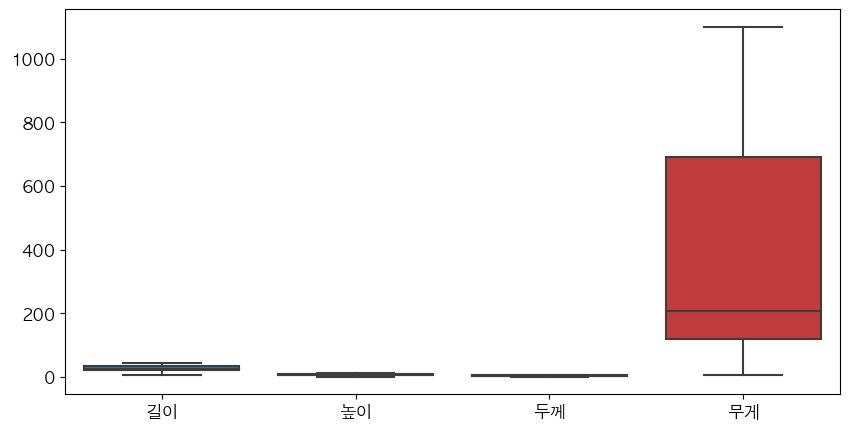

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

> 데이터의 분포가 상이하므로 표준화가 필요해 보인다
- 산점도 그래프와 추세선 확인

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Figure size 3000x3000 with 0 Axes>

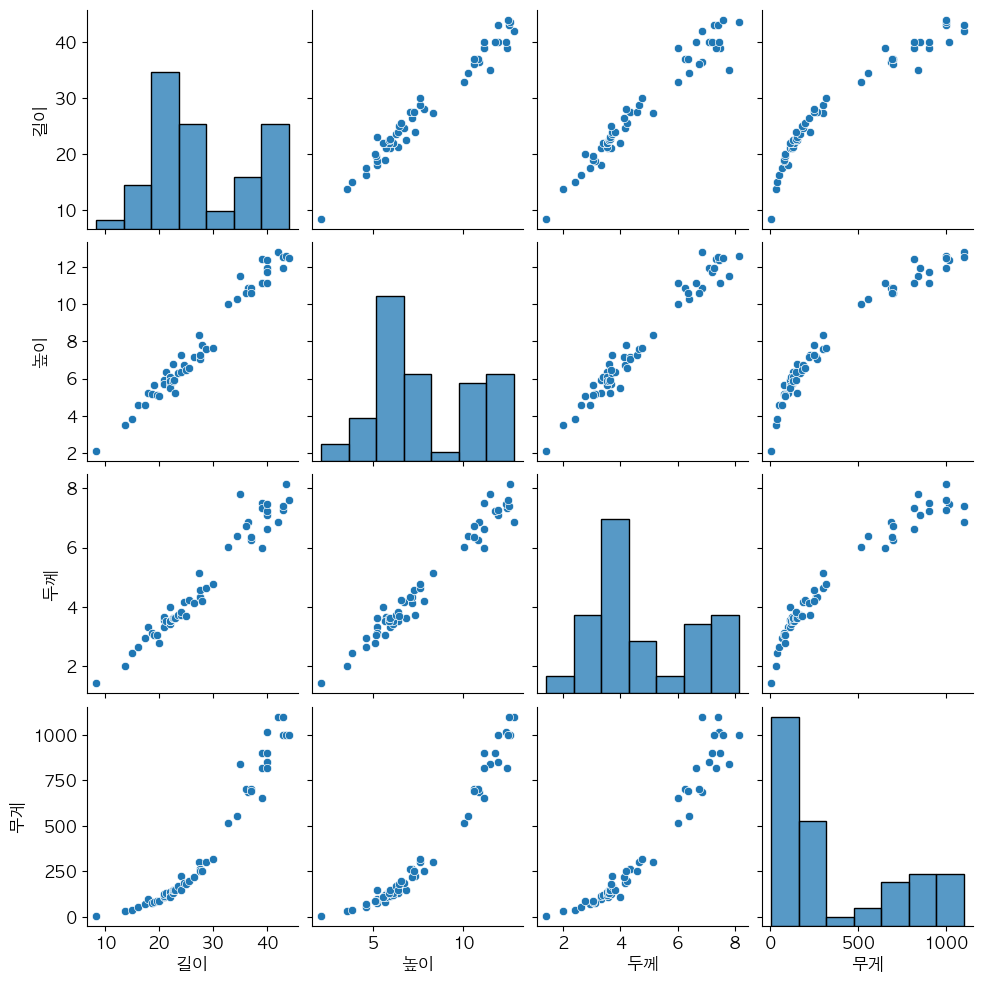

In [7]:
plt.figure(figsize = (30, 30))
sb.pairplot(origin)
plt.show()
plt.close()

> `다중공선성`이 발생할 것으로 보이고, 선형회귀보다는 `다항회귀가 더 적합해 보이지만` 예제를 위해 다항선형회귀로 진행하기로 함

### 5) 데이터셋 분할
- 랜덤시드 고정

In [8]:
np.random.seed(777)

- 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [9]:
x = origin[['길이', '높이', '두께']]
y = origin[['무게']]
x.shape, y.shape

((56, 3), (56, 1))

- 데이터 표준화

In [10]:
x_scaler = StandardScaler()
x_scale = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_scale = y_scaler.fit_transform(y)

x_scale.shape, y_scale.shape

((56, 3), (56, 1))

- 표준화 전/후 상자그림 비교

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

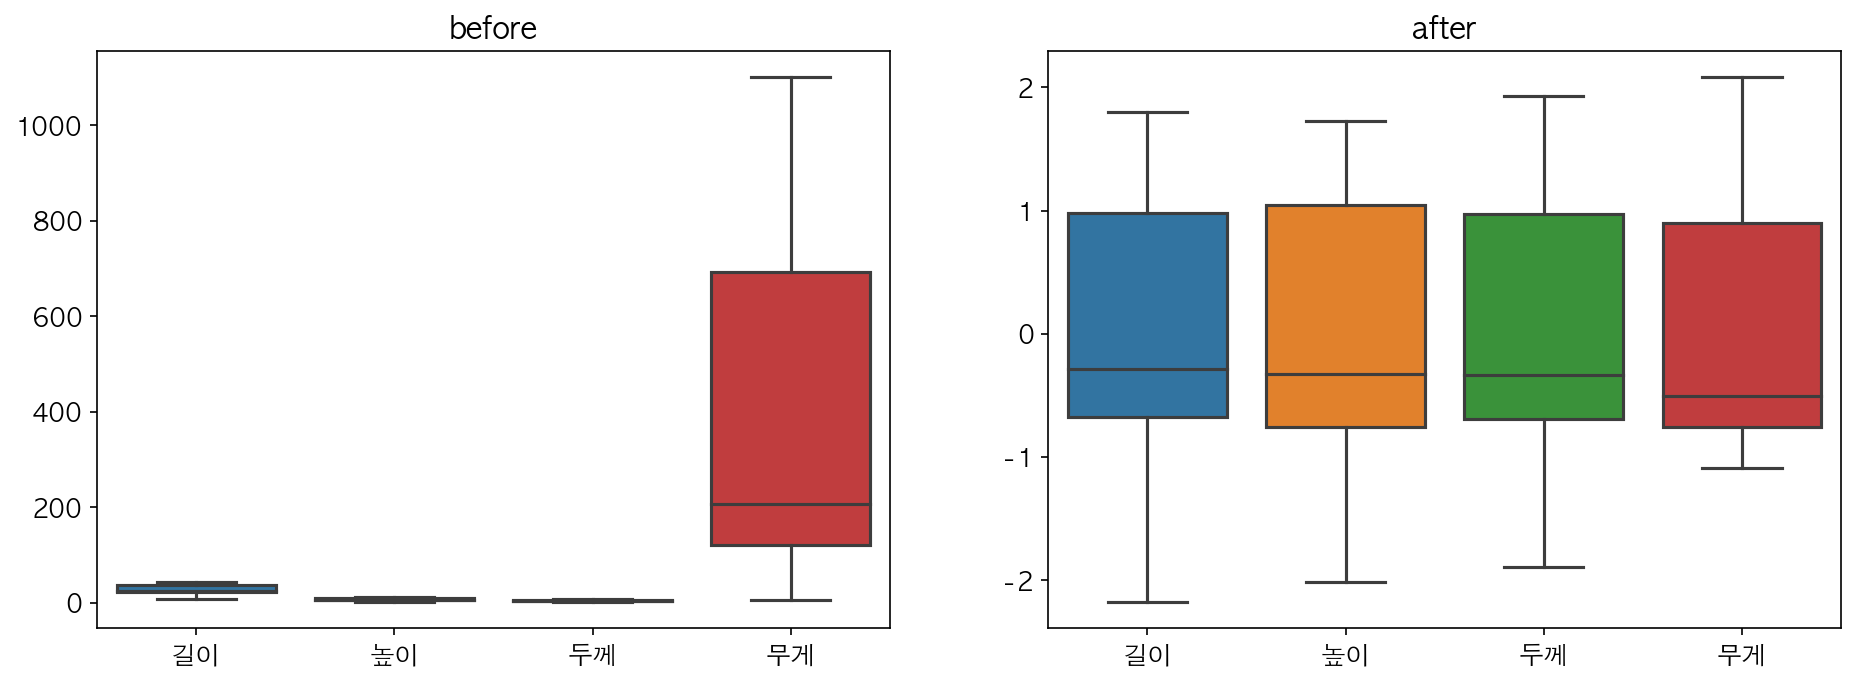

In [17]:
# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
x_scale_df = DataFrame(x_scale, columns=['길이', '높이', '두께'])
y_scale_df = DataFrame(y_scale, columns=['무게'])
tmp = merge(x_scale_df, y_scale_df, left_index=True, right_index=True)

fig, ax = plt.subplots(1, 2, figsize = (15, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=tmp, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()
plt.close()

- 훈련 데이터와 검증 데이터 분할

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, 
                                                    y_scale,
                                                    test_size=0.3,
                                                    random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 3), (17, 3), (39, 1), (17, 1))

### 6) 모델 개발
- 모델 정의
    - 데이터가 단순하고 개수가 적다면 `과대적합이 발생할 확률이 높기 때문에` 주의하면서 적절한 크기와 모델층을 쌓아야 한다

In [19]:
my_model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
my_model.add(Dense(64, activation='relu', input_shape=(len(x_train[0]), )))
my_model.add(Dense(32, activation ='relu'))

# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
my_model.add(Dense(1, activation = 'linear'))

my_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [20]:
result = my_model.fit(x_train, 
                      y_train, 
                      epochs=500, 
                      validation_data = (x_test, y_test),
                      callbacks=[EarlyStopping(monitor='val_loss',
                                               patience=10,
                                               verbose=1),
                                 ReduceLROnPlateau(monitor='val_loss',
                                                   patience=3,
                                                   factor=0.5,
                                                   min_lr=0.001,
                                                   verbose=1)])

Epoch 1/500
2/2 [==============================] - 0s 74ms/step - loss: 1.3360 - mae: 0.9373 - val_loss: 0.8761 - val_mae: 0.7394 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 18ms/step - loss: 1.1509 - mae: 0.8565 - val_loss: 0.7413 - val_mae: 0.6685 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 18ms/step - loss: 0.9818 - mae: 0.7766 - val_loss: 0.6244 - val_mae: 0.5988 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 17ms/step - loss: 0.8369 - mae: 0.6987 - val_loss: 0.5244 - val_mae: 0.5325 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 0.7194 - mae: 0.6287 - val_loss: 0.4391 - val_mae: 0.4705 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6102 - mae: 0.5644 - val_loss: 0.3692 - val_mae: 0.4139 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 23ms/step - loss: 0.5273 - mae: 0.5159 - val_loss: 0.3131 - val_mae: 0.3676 - lr: 0.0010

### 7) 학습 결과 평가

In [21]:
# 학습 결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,1.335968,0.937279,0.876114,0.739420,0.001
2,1.150860,0.856511,0.741282,0.668459,0.001
3,0.981833,0.776629,0.624406,0.598817,0.001
4,0.836880,0.698698,0.524425,0.532541,0.001
5,0.719371,0.628669,0.439098,0.470542,0.001
...,...,...,...,...,...
61,0.033145,0.133725,0.022229,0.110182,0.001
62,0.032957,0.135157,0.022478,0.112625,0.001
63,0.032752,0.135820,0.022508,0.113172,0.001


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

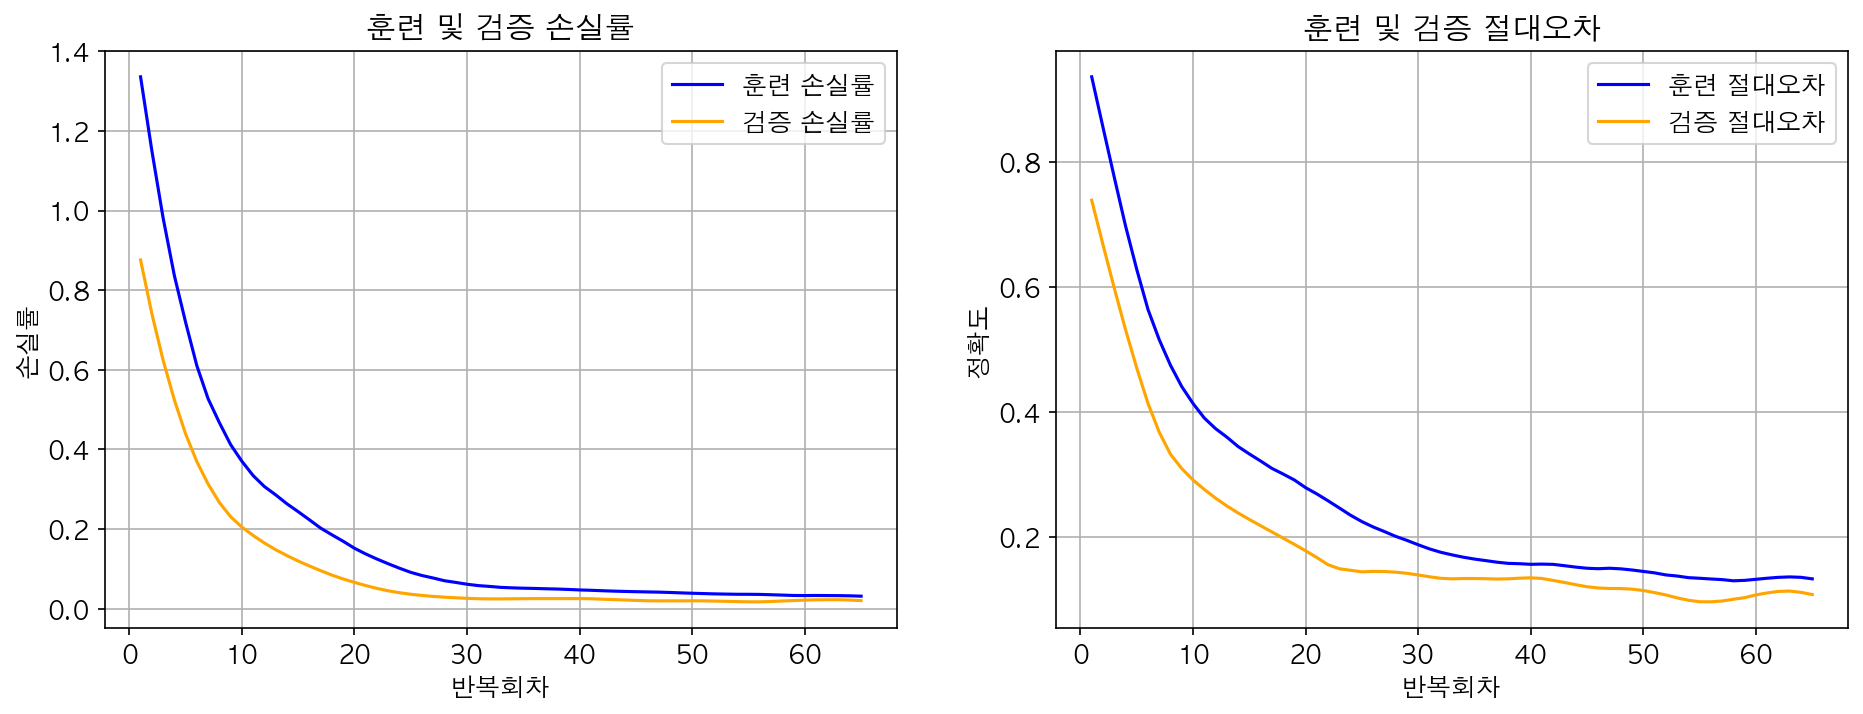

In [25]:
# 그래프 기본설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
sb.lineplot(x=result_df.index,
            y='loss',
            data=result_df,
            color='blue',
            label='훈련 손실률',
            ax=ax1)
sb.lineplot(x=result_df.index, 
            y='val_loss',
            data=result_df,
            color='orange',
            label='검증 손실률',
            ax = ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
sb.lineplot(x=result_df.index, 
            y='mae',
            data=result_df, 
            color='blue',
            label='훈련 절대오차',
            ax=ax2)
sb.lineplot(x=result_df.index, 
            y='val_mae',
            data=result_df, 
            color='orange',
            label='검증 절대오차',
            ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

- 모델 성능 평가

In [26]:
evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 절대오차: %f' % (evaluate1[0], evaluate1[1]))
evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 절대오차: %f' % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1301


최종 훈련 손실률: 0.030640, 최종 훈련 절대오차: 0.130088
1/1 [==============================] - 0s 17ms/step - loss: 0.0202 - mae: 0.1076
최종 검증 손실률: 0.020204, 최종 검증 절대오차: 0.107556


### 8) 학습 결과 적용
- 예측 결과 산정

In [27]:
train_pred = my_model.predict(x_train)
test_pred = my_model.predict(x_test)

1/1 [==============================] - 0s 13ms/step


- 결과 데이터셋 구성

In [29]:
train_df = DataFrame(x_train, columns=['길이', '높이', '두께'])
train_df['무게(관측치)'] = y_train.flatten()
train_df['무게(예측치)'] = train_pred.flatten()
train_df['훈련오차'] = train_df['무게(관측치)']-train_df['무게(예측치)'] 
train_df.head()

test_df = DataFrame(x_test, columns=['길이', '높이','두께'])
test_df['무게(관측치)'] = y_test.flatten()
test_df['무게(예측치)'] = test_pred.flatten()

test_df['훈련오차'] = test_df['무게(관측치)']-test_df['무게(예측치)']
test_df.head()                                    

,길이,높이,두께,무게(관측치),무게(예측치),훈련오차
0,-0.659101,-0.614242,-0.696689,-0.732189,-0.662483,-0.069706
1,-0.770948,-0.761480,-0.611417,-0.746703,-0.618051,-0.128653
2,-0.580807,-0.670333,-0.634156,-0.688648,-0.670359,-0.018289
3,-0.043940,-0.204080,-0.099788,-0.383859,-0.345462,-0.038396
4,0.235678,-0.084887,0.013907,-0.180666,-0.174512,-0.006153


- 실제 결과값과 머신러닝에 의한 예측값 비교

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

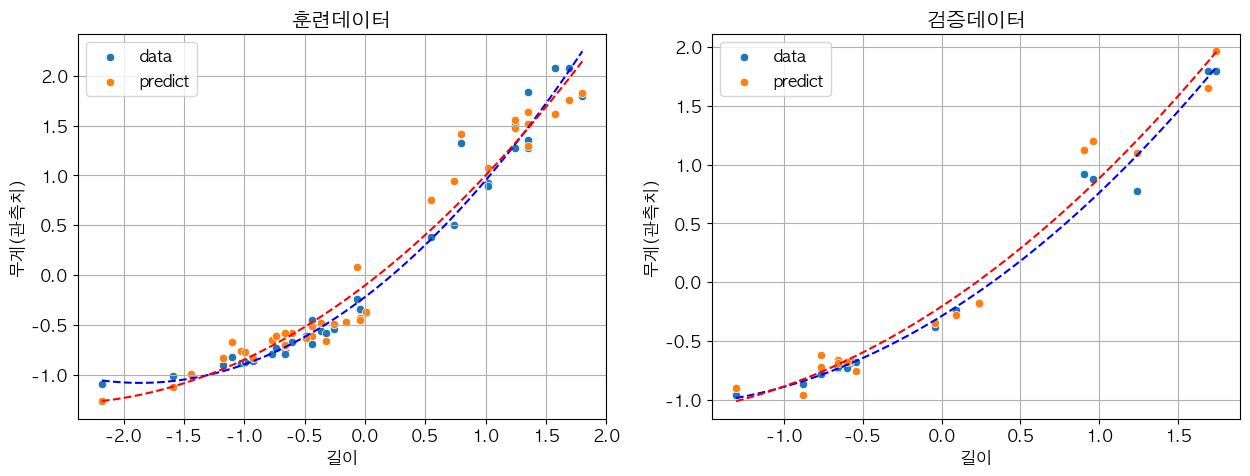

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

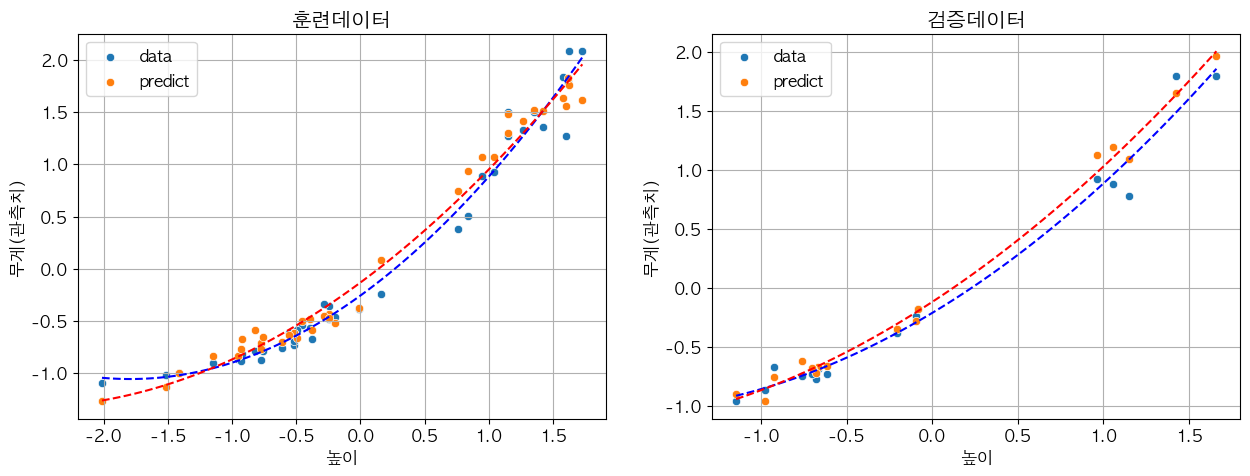

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

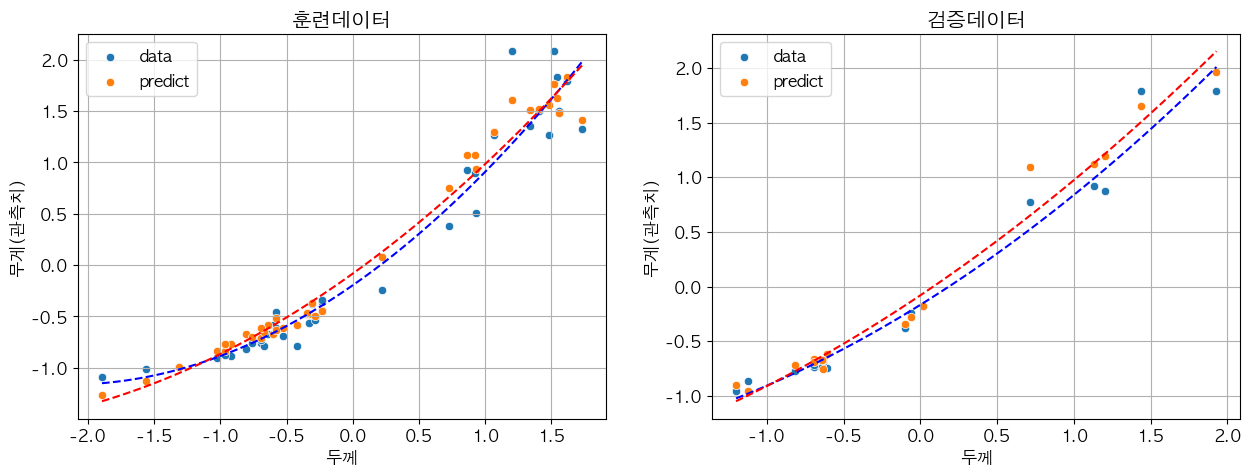

In [32]:
for key in ['길이', '높이', '두께']:
    helper.regplot(train_df[key], 
                   train_df['무게(관측치)'],
                   train_df['무게(예측치)'],
                   '훈련데이터', 
                   test_df[key], 
                   test_df['무게(관측치)'],
                   test_df['무게(예측치)'],
                   '검증데이터',
                   figsize=(15,5))